###1. longsequence 코드 lstm 모델 적용해보기

In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
torch.manual_seed(0)

In [9]:
sentences = ["i like dog", "i love coffee", "i hate milk", "you like cat", "you love milk", "you hate coffee"]
dtype = torch.float

In [12]:
word_list = list(set(" ".join(sentences).split()))
word_dict = {w: i for i, w in enumerate(word_list)}
number_dict = {i: w for i, w in enumerate(word_list)}
n_class = len(word_dict)

In [10]:
batch_size = len(sentences)
n_step = 2  # 학습 하려고 하는 문장의 길이 - 1
n_hidden = 5  # 은닉층 사이즈

In [13]:
def make_batch(sentences):
    input_batch = []
    target_batch = []
    
    for sen in sentences:
        word = sen.split()
        input = [word_dict[n] for n in word[:-1]]
        target = word_dict[word[-1]]
        
        input_batch.append(np.eye(n_class)[input])  # One-Hot Encoding
        target_batch.append(target)
    
    return input_batch, target_batch

input_batch, target_batch = make_batch(sentences)
input_batch = torch.tensor(input_batch, dtype=torch.float32, requires_grad=True)
target_batch = torch.tensor(target_batch, dtype=torch.int64)

In [14]:

class TextLSTM(nn.Module):
    def __init__(self):
        super(TextLSTM, self).__init__()
        
        self.lstm = nn.LSTM(input_size=n_class, hidden_size=n_hidden, dropout=0.3)
        self.W = nn.Parameter(torch.randn([n_hidden, n_class]).type(dtype))
        self.b = nn.Parameter(torch.randn([n_class]).type(dtype))
        self.Softmax = nn.Softmax(dim=1)
        
    def forward(self, hidden_and_cell, X):
        X = X.transpose(0, 1)
        outputs, hidden = self.lstm(X, hidden_and_cell)
        outputs = outputs[-1]  # 최종 예측 Hidden Layer
        model = torch.mm(outputs, self.W) + self.b  # 최종 예측 최종 출력 층
        
        return model

In [15]:
model = TextLSTM()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [17]:
# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [18]:
# Training
for epoch in range(500):
    hidden = torch.zeros(1, batch_size, n_hidden, requires_grad=True)
    cell = torch.zeros(1, batch_size, n_hidden, requires_grad=True)
    output = model((hidden, cell), input_batch)
    loss = criterion(output, target_batch)
    
    if (epoch + 1) % 100 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

input = [sen.split()[:2] for sen in sentences]

hidden = torch.zeros(1, batch_size, n_hidden, requires_grad=True)
cell = torch.zeros(1, batch_size, n_hidden, requires_grad=True)
predict = model((hidden, cell), input_batch).data.max(1, keepdim=True)[1]
print([sen.split()[:2] for sen in sentences], '->', [number_dict[n.item()] for n in predict.squeeze()])

Epoch: 0100 cost = 0.514085
Epoch: 0200 cost = 0.059239
Epoch: 0300 cost = 0.018966
Epoch: 0400 cost = 0.009885
Epoch: 0500 cost = 0.006248
[['i', 'like'], ['i', 'love'], ['i', 'hate'], ['you', 'like'], ['you', 'love'], ['you', 'hate']] -> ['dog', 'coffee', 'milk', 'cat', 'milk', 'coffee']


###2. https://tutorials.pytorch.kr/intermediate/char_rnn_classification_tutorial.html 위 링크 따라해보기!

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [30]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('/content/drive/My Drive/data/data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# 유니코드 문자열을 ASCII로 변환, https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# 각 언어의 이름 목록인 category_lines 사전 생성
category_lines = {}
all_categories = []

# 파일을 읽고 줄 단위로 분리
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('/content/drive/My Drive/data/data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['/content/drive/My Drive/data/data/names/French.txt', '/content/drive/My Drive/data/data/names/Korean.txt', '/content/drive/My Drive/data/data/names/English.txt', '/content/drive/My Drive/data/data/names/Italian.txt', '/content/drive/My Drive/data/data/names/Polish.txt', '/content/drive/My Drive/data/data/names/Dutch.txt', '/content/drive/My Drive/data/data/names/Spanish.txt', '/content/drive/My Drive/data/data/names/Irish.txt', '/content/drive/My Drive/data/data/names/Chinese.txt', '/content/drive/My Drive/data/data/names/German.txt', '/content/drive/My Drive/data/data/names/Vietnamese.txt', '/content/drive/My Drive/data/data/names/Scottish.txt', '/content/drive/My Drive/data/data/names/Russian.txt', '/content/drive/My Drive/data/data/names/Greek.txt', '/content/drive/My Drive/data/data/names/Japanese.txt', '/content/drive/My Drive/data/data/names/Portuguese.txt', '/content/drive/My Drive/data/data/names/Czech.txt', '/content/drive/My Drive/data/data/names/Arabic.txt']
Slusarski


In [31]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [32]:
import torch

# all_letters 로 문자의 주소 찾기, 예시 "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# 검증을 위해서 한개의 문자를 <1 x n_letters> Tensor로 변환
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# 한 줄(이름)을  <line_length x 1 x n_letters>,
# 또는 One-Hot 문자 벡터의 Array로 변경
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [33]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [34]:
input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [35]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9693, -2.8916, -2.8988, -2.8888, -2.8009, -2.9657, -2.8570, -2.9057,
         -3.0117, -2.7597, -2.8181, -2.9435, -2.8908, -2.9296, -2.8671, -2.8663,
         -2.9414, -2.8548]], grad_fn=<LogSoftmaxBackward>)


In [39]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1) # 텐서의 가장 큰 값 및 주소
    category_i = top_i[0].item()     # 텐서에서 정수 값으로 변경
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('German', 9)


In [40]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Spanish / line = Hierro
category = Spanish / line = Dominguez
category = Korean / line = Jang
category = Scottish / line = Mclaughlin
category = Korean / line = Yoon
category = Arabic / line = Ganem
category = Japanese / line = Matsumara
category = Greek / line = Sakelaris
category = Spanish / line = Bonaventura
category = Portuguese / line = Abreu


In [42]:
criterion = nn.NLLLoss()

In [43]:
learning_rate = 0.005 # 이것을 너무 높게 설정하면 발산할 수 있고, 너무 낮으면 학습이 되지 않을 수 있습니다.

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # 매개변수의 경사도에 학습률을 곱해서 그 매개변수의 값에 더합니다.
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [49]:
import math
import time

n_iters = 100000
print_every = 5000
plot_every = 1000



# 도식화를 위한 손실 추적
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # iter 숫자, 손실, 이름, 추측 화면 출력
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # 현재 평균 손실을 전체 손실 리스트에 추가
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 6s) 2.5697 Tsukehara / Spanish ✗ (Japanese)
10000 10% (0m 12s) 1.4436 Jevaikin / Russian ✓
15000 15% (0m 18s) 1.4813 O'Halloran / Irish ✓
20000 20% (0m 25s) 0.8985 Pefanis / Greek ✓
25000 25% (0m 31s) 2.6166 White / Japanese ✗ (Scottish)
30000 30% (0m 37s) 0.9028 Kuijpers / Dutch ✓
35000 35% (0m 44s) 0.5959 Dzhanaev / Russian ✓
40000 40% (0m 50s) 3.9827 Wei / Chinese ✗ (German)
45000 45% (0m 56s) 1.0122 Cabello / Portuguese ✗ (Spanish)
50000 50% (1m 2s) 1.0586 Donoghue / Irish ✓
55000 55% (1m 9s) 1.1457 Stluka / Polish ✗ (Czech)
60000 60% (1m 15s) 1.2742 Trang / Vietnamese ✓
65000 65% (1m 21s) 1.8124 Kennedy / English ✗ (Scottish)
70000 70% (1m 28s) 0.6140 Dickson / Scottish ✓
75000 75% (1m 34s) 0.6379 Dubicki / Polish ✓
80000 80% (1m 41s) 0.4459 Makricosta / Greek ✓
85000 85% (1m 47s) 1.1217 Oomen / Dutch ✓
90000 90% (1m 53s) 1.9503 Wood / Korean ✗ (Scottish)
95000 95% (1m 59s) 1.0129 Ha / Vietnamese ✗ (Korean)
100000 100% (2m 6s) 2.7694 Cruz / Spanish ✗ (Portuguese)


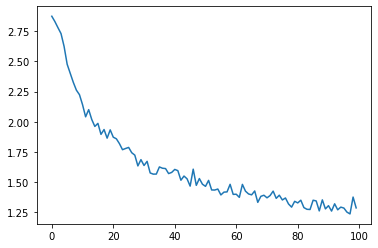

In [50]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

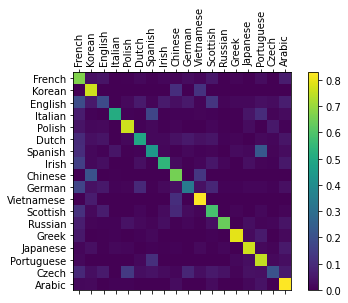

In [51]:
# 혼란 행렬에서 정확한 추측을 추적
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# 주어진 라인의 출력 반환
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# 예시들 중에 어떤 것이 정확하게 예측되었는지 기록
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# 모든 행을 합계로 나누어 정규화
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# 도식 설정
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# 축 설정
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# 모든 tick에서 레이블 지정
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [52]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-1.26) English
(-1.48) Russian
(-1.53) Czech

> Jackson
(-0.09) Scottish
(-2.72) English
(-4.51) Russian

> Satoshi
(-1.02) Japanese
(-1.51) Arabic
(-2.28) Polish
